# Analisi su rischio infarto

Proveremo ad addestrare un modello di machine learning allo scopo di predirre la categoria di rischio di un paziente in base al suo stile di vita

In [29]:
import pandas as pd
df = pd.read_csv('dataset/mainDataset.csv')
X_env=df[['Age', 'Gender', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week' , 'Previous Heart Problems' , 'Medication Use', 'Stress Level' , 'Sedentary Hours Per Day', 'BMI', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']]
Y_env = df['Heart Attack Risk']
X_env['Gender'] = X_env['Gender'].map({'Male': 1, 'Female': 0})

C:\Users\Astolfo\AppData\Local\Temp\ipykernel_2484\3131092275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_env['Gender'] = X_env['Gender'].map({'Male': 1, 'Female': 0})


prima di procedere all'addestramento dei modelli, si evidenzia la sovrabbondanza di entry che hanno il campo Heart Attack Risk (Binary) a 0.

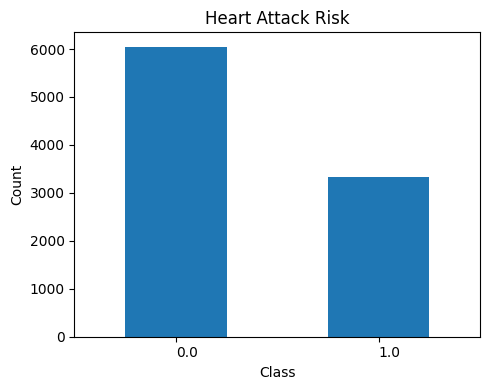

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
heart_attack_classes = df['Heart Attack Risk'].value_counts().sort_index()
heart_attack_classes.plot(kind='bar')
plt.title('Heart Attack Risk')
plt.ylabel('Count')
plt.xlabel('Class')
plt.xticks(rotation=0, ha='left')
plt.tight_layout()
plt.show()

Ciò provocherà un addestramento erroneo in seguito per via della sovrarappresentazione della classe 0 all'interno del dataset.
Per ovviare questo problema, svolgeremo delle operazioni di undersampling e oversampling

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

X_env_train, X_env_test, Y_env_train, Y_env_test = train_test_split(X_env, Y_env, test_size=0.2, random_state=42)

undersample = RandomUnderSampler(random_state=42)
smote_unbalanced = SMOTE(sampling_strategy=0.85, random_state=42)
X_env_train_smote_under, Y_env_train_smote_under = smote_unbalanced.fit_resample(X_env_train, Y_env_train)
X_env_train_smote_under, Y_env_train_smote_under = undersample.fit_resample(X_env_train_smote_under, Y_env_train_smote_under)

Y_env_train_smote_under .value_counts()

Heart Attack Risk
0.0    4095
1.0    4095
Name: count, dtype: int64

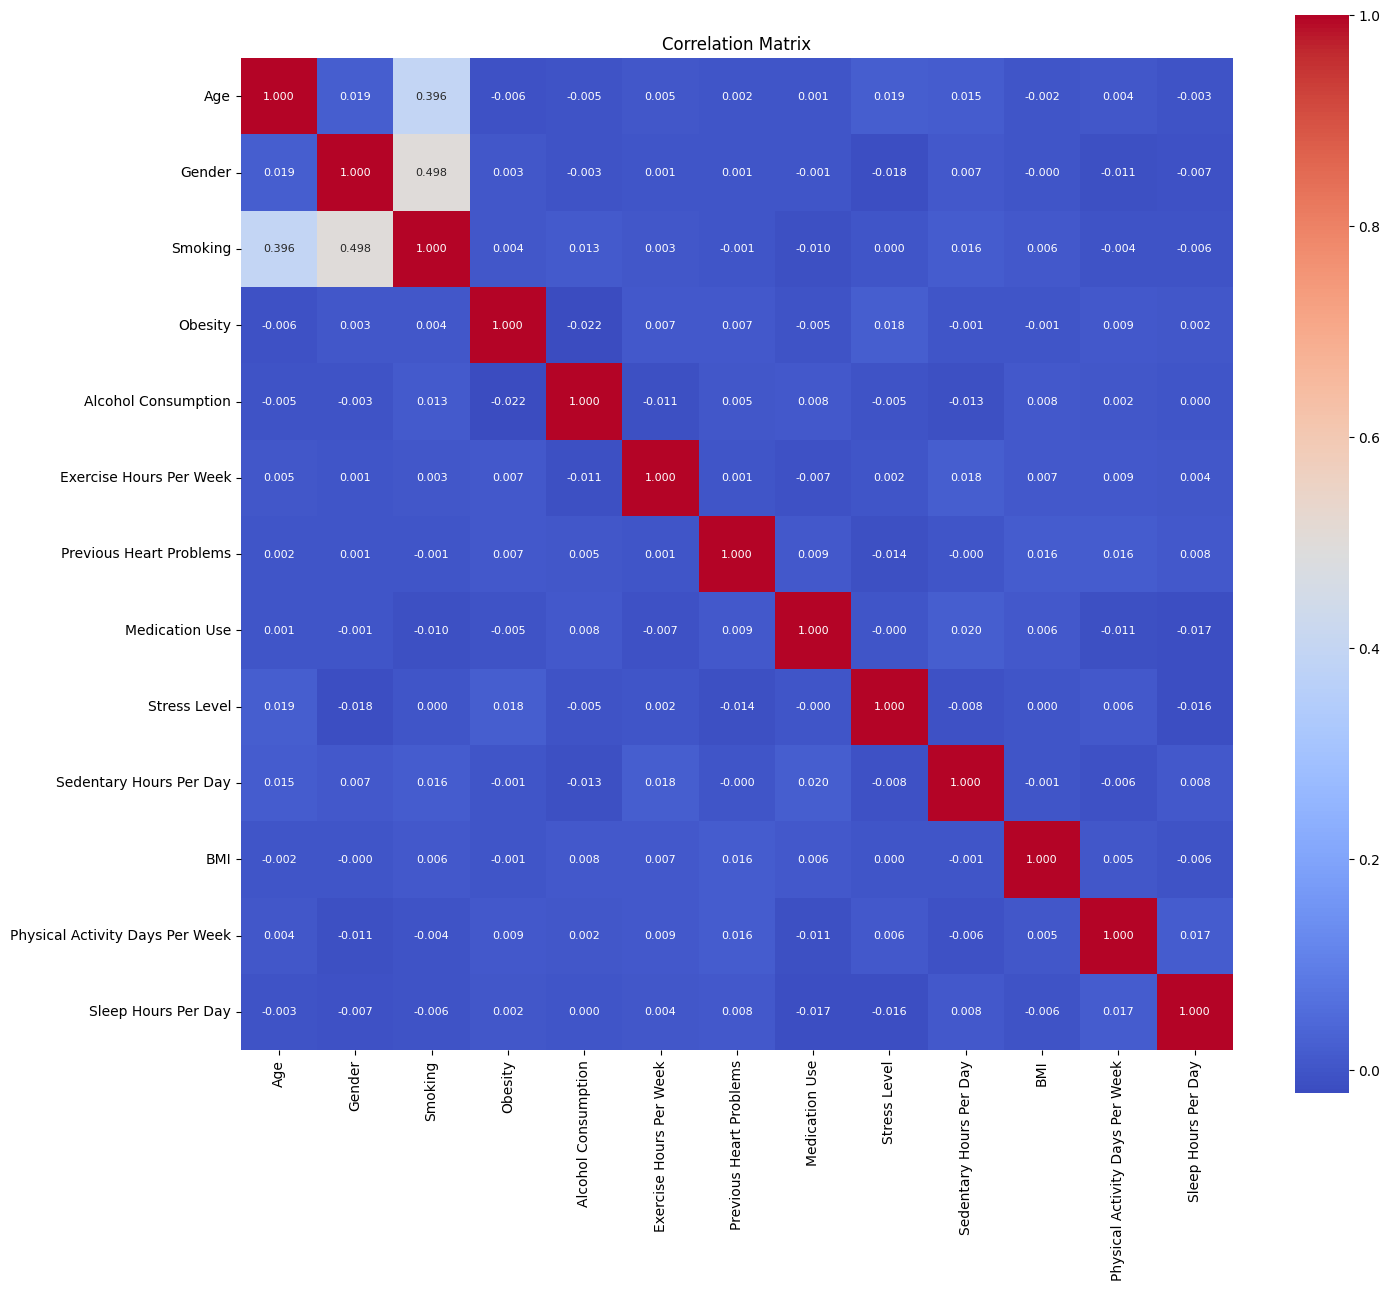

In [32]:
correlation_matrix = X_env.corr()

plt.figure(figsize=(16, 14))  # Increase the figure size
import seaborn as sns
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".3f",            # Show only 2 decimal places
    cmap='coolwarm',
    square=True,
    annot_kws={'size': 8} # Smaller font for annotations
)
plt.title('Correlation Matrix')
plt.show()

A questo punto addestriamo vari modelli

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

rf_df = RandomForestClassifier(random_state=42)
rf_df.fit(X_env_train_smote_under, Y_env_train_smote_under)
Y_pred_rf_train = rf_df.predict(X_env_train_smote_under)
Y_pred_rf_test = rf_df.predict(X_env_test)
print("###### Random Forest Classifier ######")

print("Predictions on the training set:")
print(confusion_matrix(Y_env_train_smote_under, Y_pred_rf_train))
print(classification_report(Y_env_train_smote_under, Y_pred_rf_train))

print("Predictions on the test set:")
print(confusion_matrix(Y_env_test, Y_pred_rf_test))
print(classification_report(Y_env_test, Y_pred_rf_test))


gdb_df = GradientBoostingClassifier(random_state=42)
gdb_df.fit(X_env_train_smote_under, Y_env_train_smote_under)
Y_pred_gdb_train = gdb_df.predict(X_env_train_smote_under)
Y_pred_gdb_test = gdb_df.predict(X_env_test)
print("###### Gradient Boosting Classifier ######")

print("Predictions on the training set:")
print(confusion_matrix(Y_env_train_smote_under, Y_pred_gdb_train))
print(classification_report(Y_env_train_smote_under, Y_pred_gdb_train))

print("Predictions on the test set:")
print(confusion_matrix(Y_env_test, Y_pred_gdb_test))
print(classification_report(Y_env_test, Y_pred_gdb_test))

svc_def = SVC(random_state=42)
svc_def.fit(X_env_train_smote_under, Y_env_train_smote_under)
Y_pred_svc_train = svc_def.predict(X_env_train_smote_under)
Y_pred_svc_test = svc_def.predict(X_env_test)
print("###### Support Vector Classifier ######")

print("Predictions on the training set:")
print(confusion_matrix(Y_env_train_smote_under, Y_pred_svc_train))
print(classification_report(Y_env_train_smote_under, Y_pred_svc_train))

print("Predictions on the test set:")
print(confusion_matrix(Y_env_test, Y_pred_svc_test))
print(classification_report(Y_env_test, Y_pred_svc_test))

knn_df = KNeighborsClassifier()
knn_df.fit(X_env_train_smote_under, Y_env_train_smote_under)
Y_pred_knn_train = knn_df.predict(X_env_train_smote_under)
Y_pred_knn_test = knn_df.predict(X_env_test)

print("###### K-Nearest Neighbors Classifier ######")
print("Predictions on the training set:")
print(confusion_matrix(Y_env_train_smote_under, Y_pred_knn_train))
print(classification_report(Y_env_train_smote_under, Y_pred_knn_train))

print("Predictions on the test set:")
print(confusion_matrix(Y_env_test, Y_pred_knn_test))
print(classification_report(Y_env_test, Y_pred_knn_test))





###### Random Forest Classifier ######
Predictions on the training set:
[[4095    0]
 [   0 4095]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4095
         1.0       1.00      1.00      1.00      4095

    accuracy                           1.00      8190
   macro avg       1.00      1.00      1.00      8190
weighted avg       1.00      1.00      1.00      8190

Predictions on the test set:
[[935 293]
 [443 205]]
              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72      1228
         1.0       0.41      0.32      0.36       648

    accuracy                           0.61      1876
   macro avg       0.55      0.54      0.54      1876
weighted avg       0.59      0.61      0.59      1876

###### Gradient Boosting Classifier ######
Predictions on the training set:
[[3795  300]
 [2269 1826]]
              precision    recall  f1-score   support

         0.0       0.63      0.93    